In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import requests
from io import BytesIO

# OpenCV 출력
from google.colab.patches import cv2_imshow

# 형태학적 변환(Morphological Transformations)
* 이미지를 단순화, 제거, 보정 등을 통해 형태를 파악하는 목적
* 일반적으로 binary, grayscale image에 사용
* Dilation(팽창), Erosion(침식), 팽창과 침식을 조합한 opening, closing
* input
 - 원본 image
 - structuring element
 -- 원본 이미지에 적용되는 kernel
 -- 꽉찬 사각형, 타원형, 십자형...

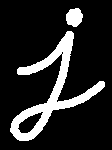

In [6]:
j=cv2.imread('/content/j.png',0)
cv2_imshow(j)

In [7]:
j.shape

(150, 112)

# 1. Erosion(침식)
* cv2.erode()
* 각 pixel에 structuring element를 적용하여 하나라도 0이 있으면 대상 pixel 제거
* 작은 대상(object)을 제거하는 효과
* parameter
 - src
 - kernel : structuring element, cv2.getStructuringElement() 함수를 이용해 생성
 - anchor : structuring element 중심, default(-1,-1) 중심점
 - iterations : erosion 반복 횟수

In [8]:
kernel1=np.ones((5,5), np.uint8)
kernel2=np.ones((10,10), np.uint8)
kernel3=np.ones((20,20), np.uint8)

j1_erosion=cv2.erode(j, kernel1, iterations=1)
j2_erosion=cv2.erode(j, kernel2, iterations=1)
j3_erosion=cv2.erode(j, kernel3, iterations=1)

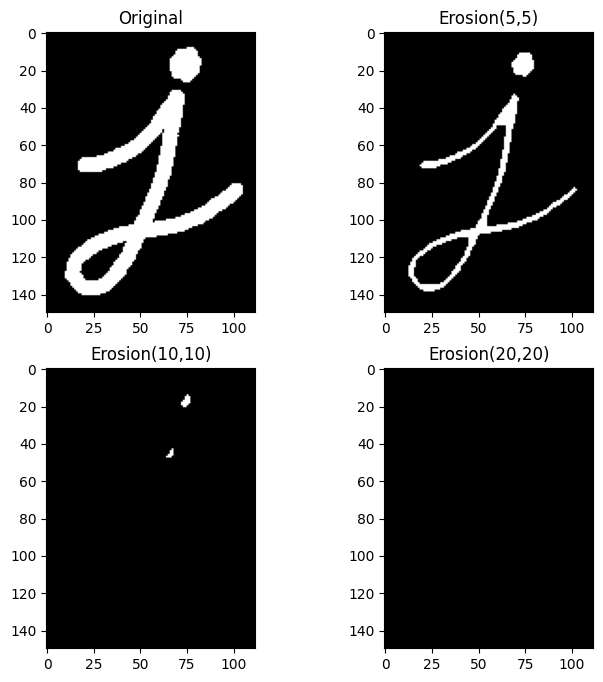

In [9]:
title=['Original', 'Erosion(5,5)', 'Erosion(10,10)', 'Erosion(20,20)']
images=[j, j1_erosion, j2_erosion, j3_erosion]
plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(title[i])
plt.show()

# Dilation(팽창)
* cv2.dilate()
* Erosion과 반대 작용
* 대상을 팽창시킨 후 작은 구멍을 채우는 방법

In [10]:
kernel1=np.ones((5,5), np.uint8)
kernel2=np.ones((10,10), np.uint8)
kernel3=np.ones((20,20), np.uint8)

j1_dilation=cv2.dilate(j, kernel1, iterations=1)
j2_dilation=cv2.dilate(j, kernel2, iterations=1)
j3_dilation=cv2.dilate(j, kernel3, iterations=1)

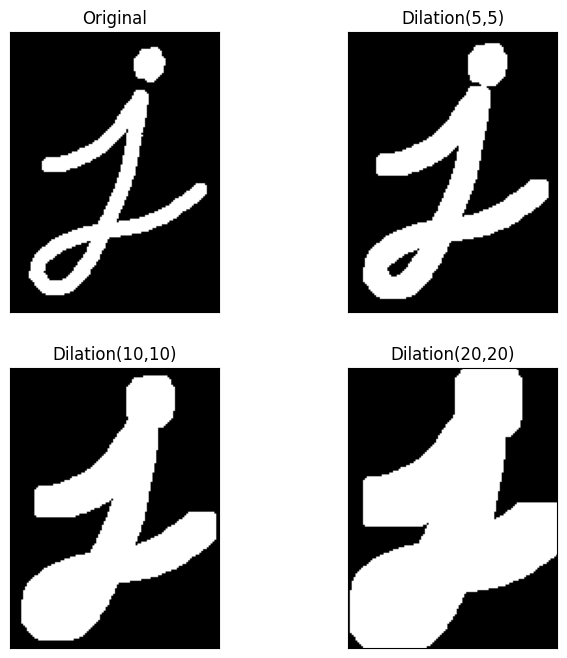

In [11]:
titles=['Original', 'Dilation(5,5)', 'Dilation(10,10)', 'Dilation(20,20)']
images=[j, j1_dilation, j2_dilation, j3_dilation]
plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

# 3. Opening & Closing
* cv2.morphologyEx()
* Erosion, Dilation의 조합
* Opening : Erosion 적용 후, Dilation 적용 => 작은 object나 돌기 제거에 적합
* closing : Dilation 적용 후, Erosion 적용 => 전체적인 윤곽 파악에 적합
* parameter
 - src
 - op : 연산방법
 -- MORPH_OPEN : 열기 동작
 -- MORPH_CLOSE : 닫기 동작

In [12]:
kernel=np.ones((5,5), np.uint8)
j_opening=cv2.morphologyEx(j,cv2.MORPH_OPEN, kernel)
j_closing=cv2.morphologyEx(j,cv2.MORPH_OPEN, kernel)

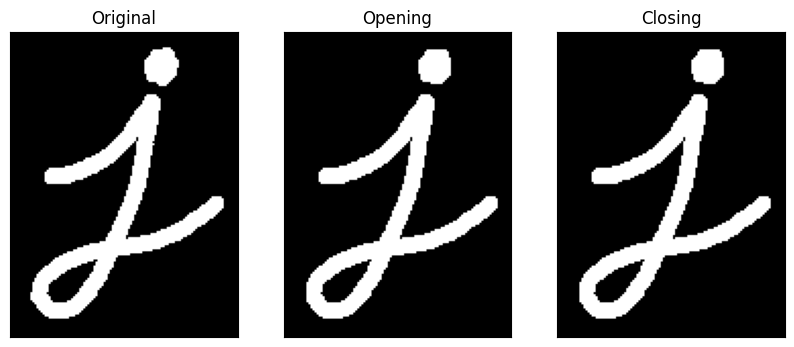

In [13]:
titles=['Original', 'Opening', 'Closing']
images=[j, j_opening, j_closing]
plt.figure(figsize=(10,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

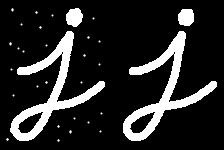

In [14]:
opening_j = cv2.imread('/content/opening_j.png',0)
cv2_imshow(opening_j)

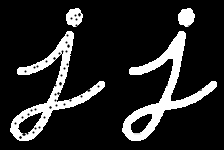

In [15]:
closing_j = cv2.imread('/content/closing_j.png',0)
cv2_imshow(closing_j)

In [16]:
kernel = np.ones((5,5), np.uint8)
opening_j_oepning = cv2.morphologyEx(opening_j,cv2.MORPH_OPEN,kernel)
closing_j_closing = cv2.morphologyEx(closing_j,cv2.MORPH_CLOSE,kernel)

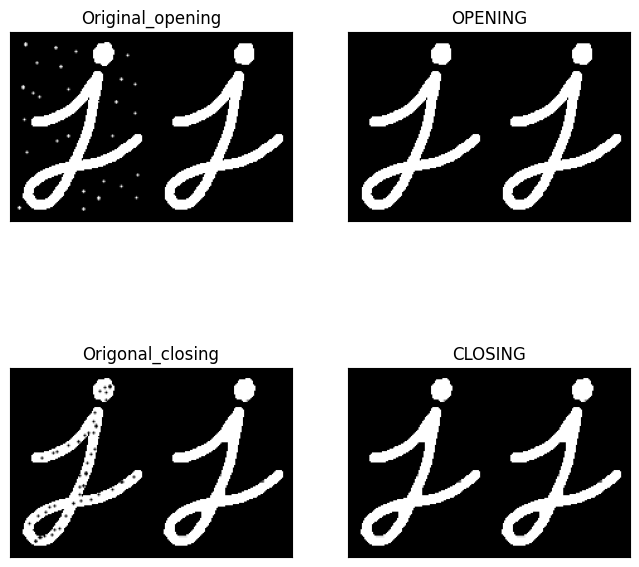

In [17]:
titles =['Original_opening','OPENING','Origonal_closing','CLOSING']
images =[opening_j,opening_j_oepning,closing_j, closing_j_closing]
plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap ='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Morphological Gradient
* Deliation, Erosion 차이
* cv2.morphologicalEx
* cv2.MORPH_GRADIENT

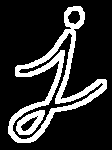

In [26]:
j_gradient=cv2.morphologyEx(j, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(j_gradient)

# Structuring Element
* numpy를 이용해 생성
* cv2.getStructeringElement()
 - parameter
 -- shape : MORPH_RECT(사각형), MORPH_ELLIPSE(타원), MORPH_CROSS(십자형)
 -- ksize : 크기, 사이즈

In [30]:
kernel_np = np.ones((5,5), np.uint8)
kernel_np

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [32]:
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kernel_rect

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [33]:
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
kernel_ellipse

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [24]:
kernel_cross=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
kernel_cross

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [34]:
j_gradient_rect =cv2.morphologyEx(j, cv2.MORPH_GRADIENT, kernel_rect)
j_gradient_ellipse =cv2.morphologyEx(j, cv2.MORPH_GRADIENT, kernel_ellipse)
j_gradient_cross =cv2.morphologyEx(j, cv2.MORPH_GRADIENT, kernel_cross)

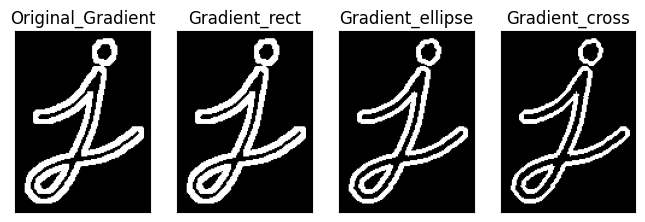

In [35]:
titles =['Original_Gradient','Gradient_rect','Gradient_ellipse','Gradient_cross']
images =[j_gradient, j_gradient_rect, j_gradient_ellipse,j_gradient_cross]
plt.figure(figsize=(8,20))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap ='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

# 이미지 블러링(Image Blurring)
* low-pass filter를 이미지에 적용
* 고주파 영역을 제거함으로써 노이즈를 제거하거나 경계선을 흐리게함
* OpenCV에서 제공하는 Blurring 기법
 - Averaging
 - Gaussian Filtering
 - Bilateral Filtering

# Averaging
* box형태의 kernel을 이미지에 적용한 후 평균값을 box의 중심점에 적용하는 방법
* cv2.blur(), cv2.boxFilter()
* parameter
 - src : channel 수에 무관
 - depth(Data Type) : CV_8U, CV_16U, CV_16S, CV_32F...
 - ksize : kernel size(3,3)
 - ex) 3x3 : $\ K = \frac{1}{9} \begin{vmatrix} 1&1&1 \\ 1&1&1 \\ 1&1&1 \end{vmatrix}$
*Data Type
 -CV_8U : 8bit unsigned interger, uchar(0,255)
 -CV_8S : 8bit unsigned interger, schar(-128,127)
 -CV_16U : 16bit unsigned interger, uchar(0,65535)

In [36]:
cat=cv2.imread('/content/cat.jpg')
cat=cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

In [37]:
cat_Avg=cv2.blur(cat,(7,7),0)

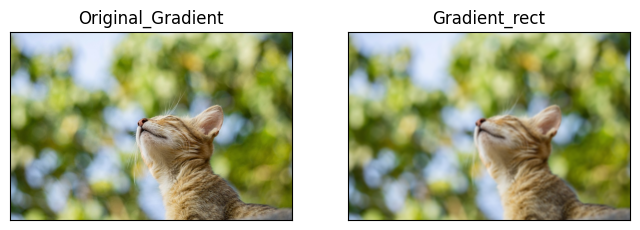

In [38]:
title=['cat','Averaging_Blurring']
images=[cat, cat_Avg]
plt.figure(figsize=(8,15))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Gaussian Filtering
* cv2.GaussianBlur()
* Gaussian 함수를 이용한 kernal 사용
* Gsussian Noise : 밀도가 동일한 노이즈, 백색노이즈 제거에 효과적

In [39]:
cat_gau=cv2.GaussianBlur(cat,(7,7),0)

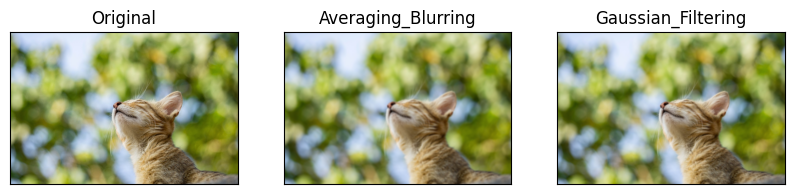

In [40]:
titles=['Original','Averaging_Blurring', 'Gaussian_Filtering']
images=[cat, cat_Avg, cat_gau]
plt.figure(figsize=(10,20))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

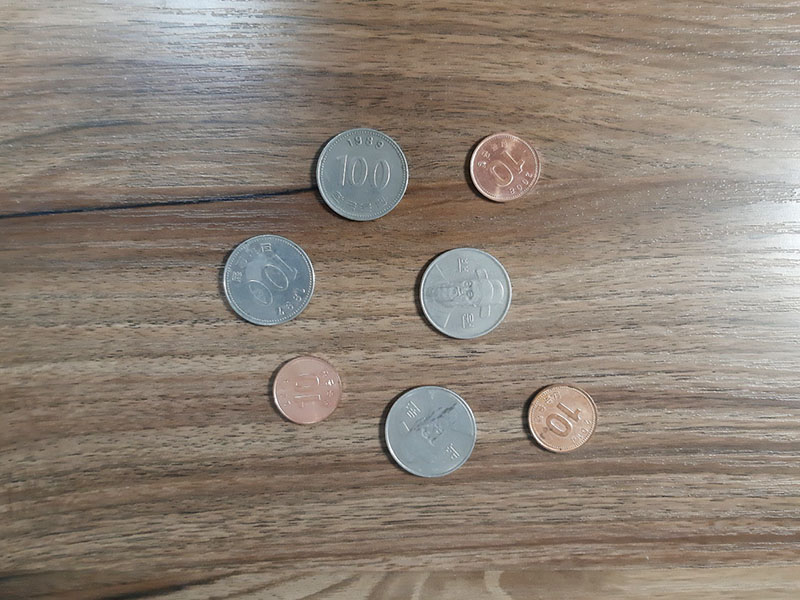

In [41]:
coins2=cv2.imread('/content/coins2.jpg')
cv2_imshow(coins2)

In [42]:
import sys

In [43]:
if coins2 is None:
    print('Image is None')
    sys.exit()

coins2_gray=cv2.cvtColor(coins2, cv2.COLOR_BGR2GRAY)
coins2_gray_blur=cv2.GaussianBlur(coins2_gray,(0,0),1)

In [44]:
# 원 검출
# HOUGH 변환(허프변환)
# cv2.HoughCircles()
# image
# method : cv2.HOUGH_GRADIENT(OpenCV 4.2 이하에서 존재)
# dp : 영상과 크기 비율 (1: 동일 크기, 2: 입력 영상의 반)
# minDist : 검출된 원 중심점들의 최소 거리
# param1 : 에지 검출기의 높은 임계값
# param2 : 축적 배열에서 원 검출을 위한 임계값
# minRadius : 검출할 원의 최소 반지름
# maxRadius : 검출할 원의 최대 반지름

circles=cv2.HoughCircles(coins2_gray_blur, cv2.HOUGH_GRADIENT, 1, 50,
                         param1=150, param2=40, minRadius=20, maxRadius=80)

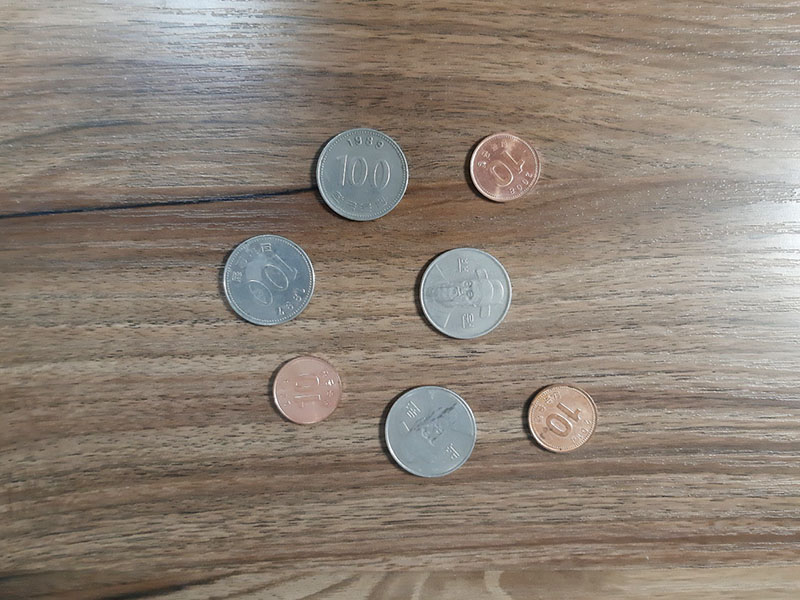

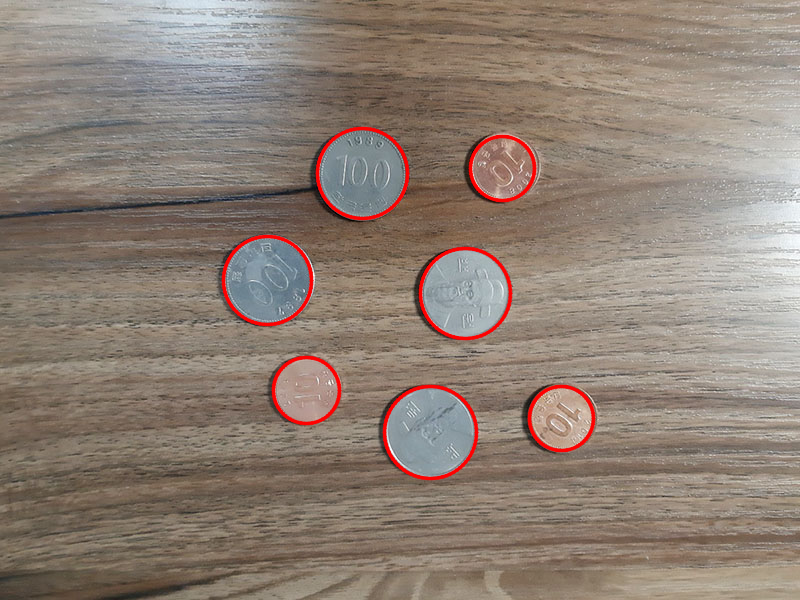

In [45]:
# 원 검출 결과
dst = coins2.copy()

if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius=circles[0][i]

        cx=int(cx)
        cy=int(cy)
        radius=int(radius)

        cv2.circle(dst, (cx,cy),radius, (0,0,255),2,cv2.LINE_AA)

        # 동전 부분 영상 추출
        x1 = int(cx-radius)
        x2 = int(cx+radius)
        y1 = int(cy-radius)
        y2 = int(cy+radius)
        radius = int(radius)

        crop = dst[y1:y2, x1:x2, :]
        ch, cw = crop.shape[:2]

        mask=np.zeros((ch,cw), np.uint8)
        cv2.circle(mask,(cw//2, ch//2), radius, 255, -1)

cv2_imshow(coins2)
cv2_imshow(dst)

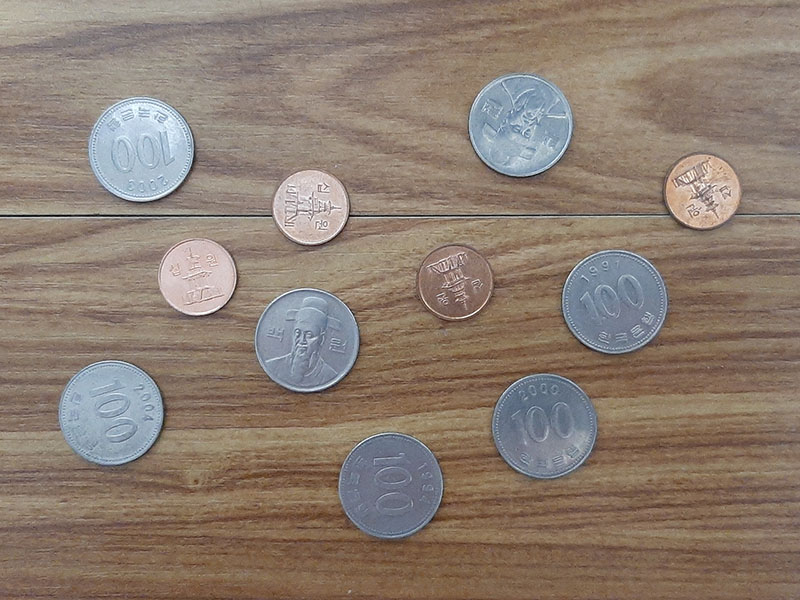

In [46]:
coins1=cv2.imread('/content/coins1.jpg')
cv2_imshow(coins1)

In [47]:
!pip list # 버전 정보가 다 뜸

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


# 객체 탐지(Object Detection)
* 이미지에서 객체와 경계상자(bounding box)를 탐지
* 객체탐지 알고리즘 : 이미지를 입력받아 경계상자와 객체 클래스 리스트 출력
* 예측 클래스, 신뢰도
* 자율주행자동차, 의료분야, 제조업(로봇, 카메라...), 탐지...

# Bounding Box : 경계상자
* 이미지에서 하나의 객체 전체를 포함하는 가장 직은 직사각형

# IOU(Intersection Over Union)
* 실측값(Ground Truth)과 모델이 예측한 값이 얼마나 겹치는지를 나타내는 지표
* IoU = Area of Overlap / Area of Union
* IoU가 높을수록 예측을 잘한 모델

# NMS(None-Maximum Suppression) : 비최대값 억제
* 확률이 가장 높은 bounding box가 겹치는 box들을 제거하는 과정
* 확률의 최대값을 가지는 box만 존재(나머지 box는 제거)
* 실행과정
 1. Box 정렬(확률순으로) 후 확률이 가장 높은 상자를 취함
 2. 각 Box에 대해 다른 모든 Box와의 IoU 계산
 3. 주어진 임계값을 벗어나는 Box 제거

# 모델 성능 평가
* 정밀도(Precision) : TP/(TP+FP)
* 재현율(Recall) : TP/(TP+FN)
 - TP(True Positives) : 예측이 동일 클래스의 실제 Box와 일치하는지 측정
 - FP(False Positives) : 예측이 실제 Box와 일치하지 않는지 측정
 - FN(False Negatives): 실제 분류값이 그와 일치하는 예측값을 갖지 못하는지 측정

# 데이터셋(Dataset)

# VOC Dataset
* 20개의 클래스(bicycle, bird, car, bus, dog, person...)
* 훈련/검증 데이터 : 약 11만 개
* 이미지당 2.4개의 객체 존재

# COCO Dataset
* 20만 개 이미지
* 80개 카테고리
* https://cocodataset.org/

# 객체 탐지 역사
* RCNN(2013) : 매우 높은 detection 가능, 복잡한 구조로 인해 detection 시간이 오래 걸림
* SPP Net(2014) : RCNN에 비해 실행시간 단축
* Fast RCNN(2015)
* Faster RCNN(2015)
* SSD(2015) : real-time으로 사용 가능(30~40 fps)
* YOLO(2018) : v1, v2, v3
* YOLOv4(2020)

# YOLO(You Only Look Once)
* 가장 빠른 객체 검출 알고리즘 중 하나
* 파이썬, 텐서플로 기반이 아닌 C++로 구현된 코드 기준 GPU 사용시 170FPS
* 작은 크기의 물체를 탐지하는데 어려움

# Anchor Box
* YOLOv2에 도입
* 객체에 가장 근접한 앵커 박스를 맞추고 신경망을 이용해 크기를 조절하는 방법

In [48]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


# YOLOv3 모델(Tensorflow)

In [ ]:
#!pip uninstall -y tensorflow keras

In [49]:
!git clone https://github.com/zzh8829/yolov3-tf2
%cd yolov3-tf2/
#!pip install keras==2.4.2 # yolov3의 버전에 맞춰서 설치

Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 442 (delta 3), reused 6 (delta 2), pack-reused 433
Receiving objects: 100% (442/442), 4.24 MiB | 19.84 MiB/s, done.
Resolving deltas: 100% (251/251), done.
/content/yolov3-tf2


In [50]:
!ls

checkpoints	 conda-gpu.yml	detect.py	 LICENSE	       requirements.txt  train.py
colab_gpu.ipynb  convert.py	detect_video.py  README.md	       setup.py		 yolov3_tf2
conda-cpu.yml	 data		docs		 requirements-gpu.txt  tools


# 모델 파일 변환
* DarkNet의 모델 파일을 Keras에서 사용할 수 있는 모델 파일로 변환
* yolov3.weight : DarkNet으로 학습된 모델 파일
* yolov3.tf : Keras Yolov3모델
* convert.py : 변환 실행파일

In [51]:
!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights

--2024-05-22 00:44:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘data/yolov3.weights’

data/yolov3.weights 100%[===================>] 236.52M  36.0MB/s    in 7.1s    

2024-05-22 00:44:58 (33.5 MB/s) - ‘data/yolov3.weights’ saved [248007048/248007048]



In [52]:
!python convert.py  #--weights ./data/yolov3.weights --output ./checkpoints/yolov3.tf

2024-05-22 00:45:10.897780: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 00:45:10.897845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 00:45:10.899360: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-22 00:45:10.908363: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 00:45:12.180708: W tensorflow/compiler/tf2

In [53]:
import time
import cv2
import numpy as np
import tensorflow as tf

from yolov3_tf2.models import YoloV3
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs
from absl import app, logging, flags
from absl.flags import FLAGS
from keras.preprocessing import image
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [54]:
flags.DEFINE_string('classes','./data/coco.names','classes file')
flags.DEFINE_string('weights','./checkpoints/yolov3.tf','weights file')
flags.DEFINE_boolean('tiny',False,'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size','416','resize images to')
flags.DEFINE_string('image','./data/girl.png','imput image')
flags.DEFINE_string('output','./output.jpg','output image')
flags.DEFINE_string('tfrecord',None,'tfrecord')
flags.DEFINE_integer('num_classes',80, 'number of classes')

app._run_init(['yolov3'], app.parse_flags_with_usage)

['yolov3']

In [55]:
yolo = YoloV3(classes = FLAGS.num_classes)
yolo.load_weights(FLAGS.weights).expect_partial()
class_names = [c.strip() for c in open(FLAGS.classes).readlines()]

In [56]:
def detector():
    img_raw = tf.image.decode_image(open(FLAGS.image, 'rb').read(), channels =3)
    image = tf.expand_dims(img_raw, 0)
    img = transform_images(image, FLAGS.size)
    t1 = time.time()
    boxes, scores, classes, nums=yolo(img)
    t2 = time.time()
    print('time : {}'.format(t2-t1))
    for i in range(nums[0]):
        print('{} {} {}'.format(class_names[int(classes[0][i])],
                                np.array(scores[0][i]),
                                np.array(boxes[0][i])))
    img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
    img = draw_outputs(img, (boxes, scores, classes, nums), class_names)

    return img

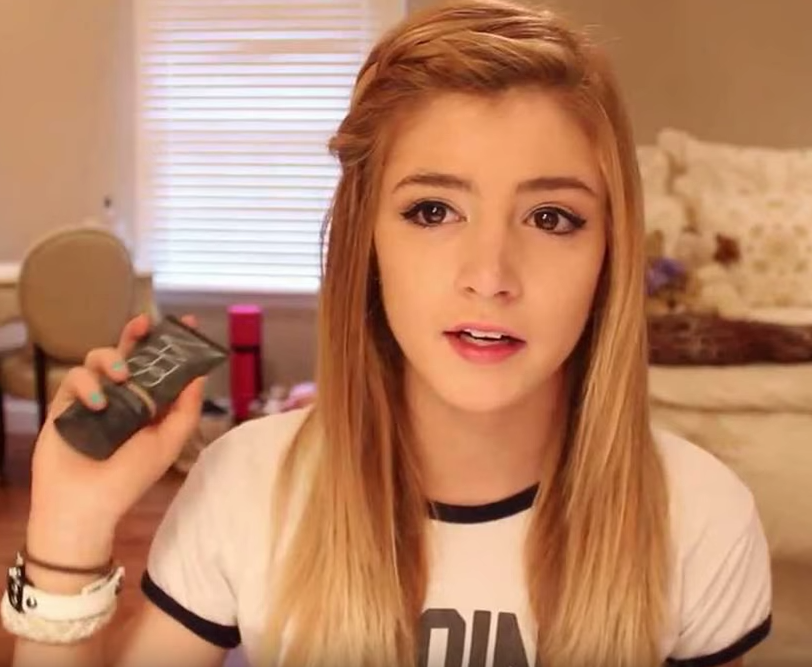

In [57]:
FLAGS.image = '/content/yolov3-tf2/data/girl.png'
Image(filename =FLAGS.image, width =500)

time : 2.2498981952667236
person 0.9997697472572327 [0.06754467 0.03718692 0.967988   0.96507543]
chair 0.9255478978157043 [0.01851872 0.34200278 0.17385134 0.6278329 ]


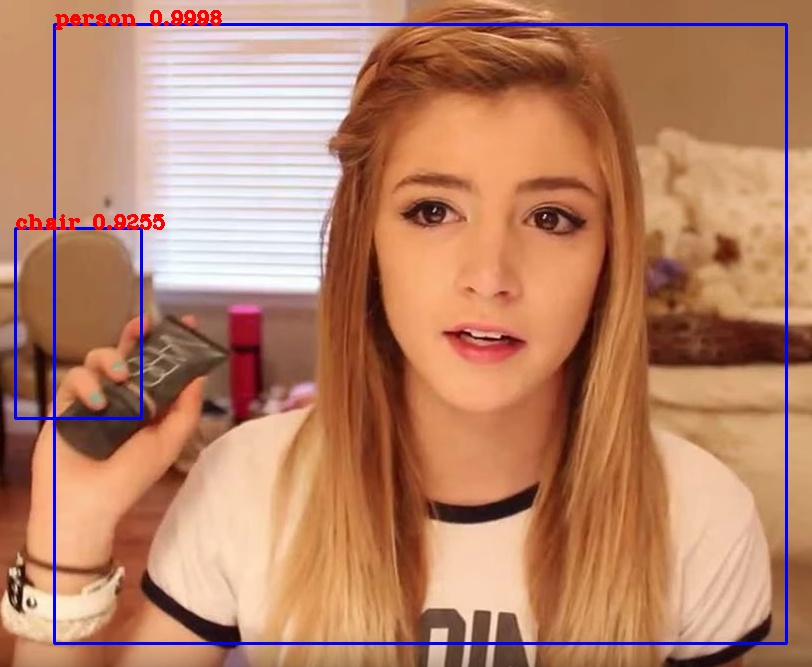

In [58]:
output = detector()
display(Image(data = bytes(cv2.imencode('.jpg', output)[1]), width =500))

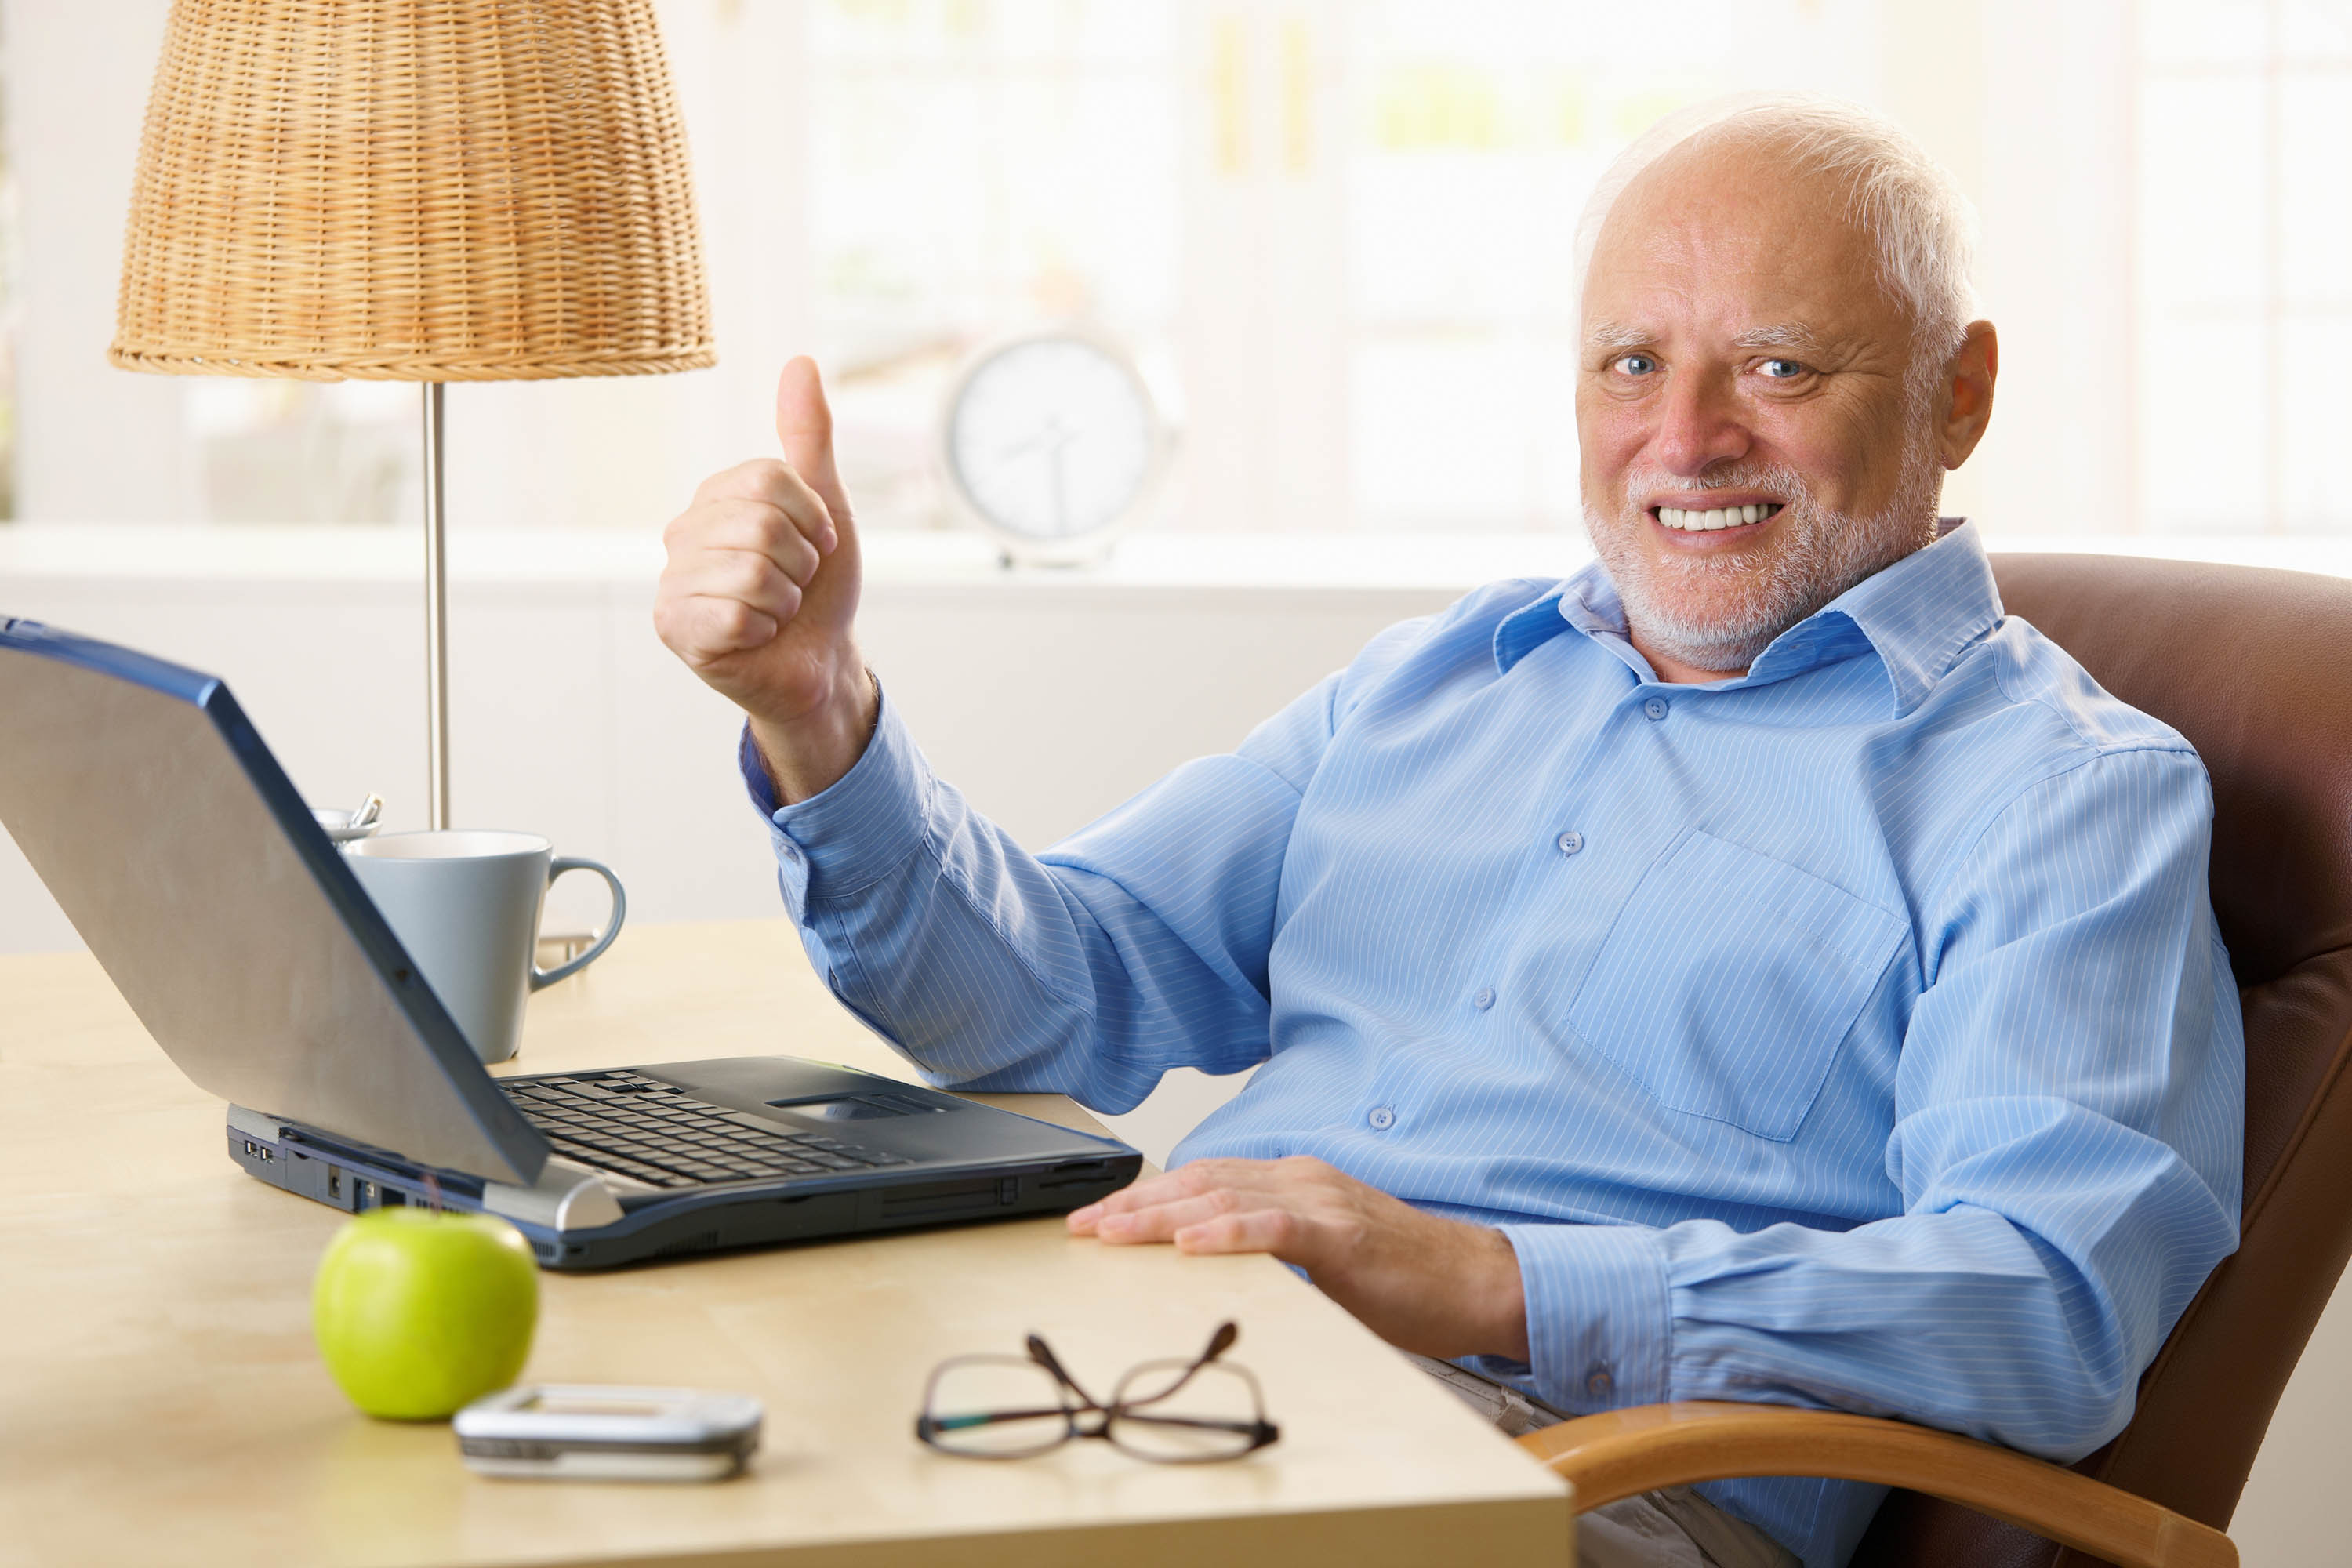

In [59]:
FLAGS.image = '/content/yolov3-tf2/data/meme.jpg'
Image(filename =FLAGS.image, width =1000)

time : 2.7114648818969727
cup 0.9980729818344116 [0.1426622  0.52777606 0.27184254 0.65748256]
person 0.9976975321769714 [0.28982913 0.09854648 0.95846486 0.9202168 ]
laptop 0.9599869847297668 [-0.01710653  0.39493692  0.5229728   0.7962775 ]
apple 0.9081622958183289 [0.13114461 0.77143586 0.22893354 0.90729535]
cell phone 0.7321370840072632 [0.18850094 0.87569416 0.33501852 0.9422209 ]
clock 0.6700012683868408 [0.4010809  0.2124461  0.49267417 0.35021502]
cup 0.5366387963294983 [0.15088232 0.52855617 0.25541586 0.66439587]
chair 0.5001125335693359 [0.2950731  0.30677187 0.9998861  0.9955944 ]


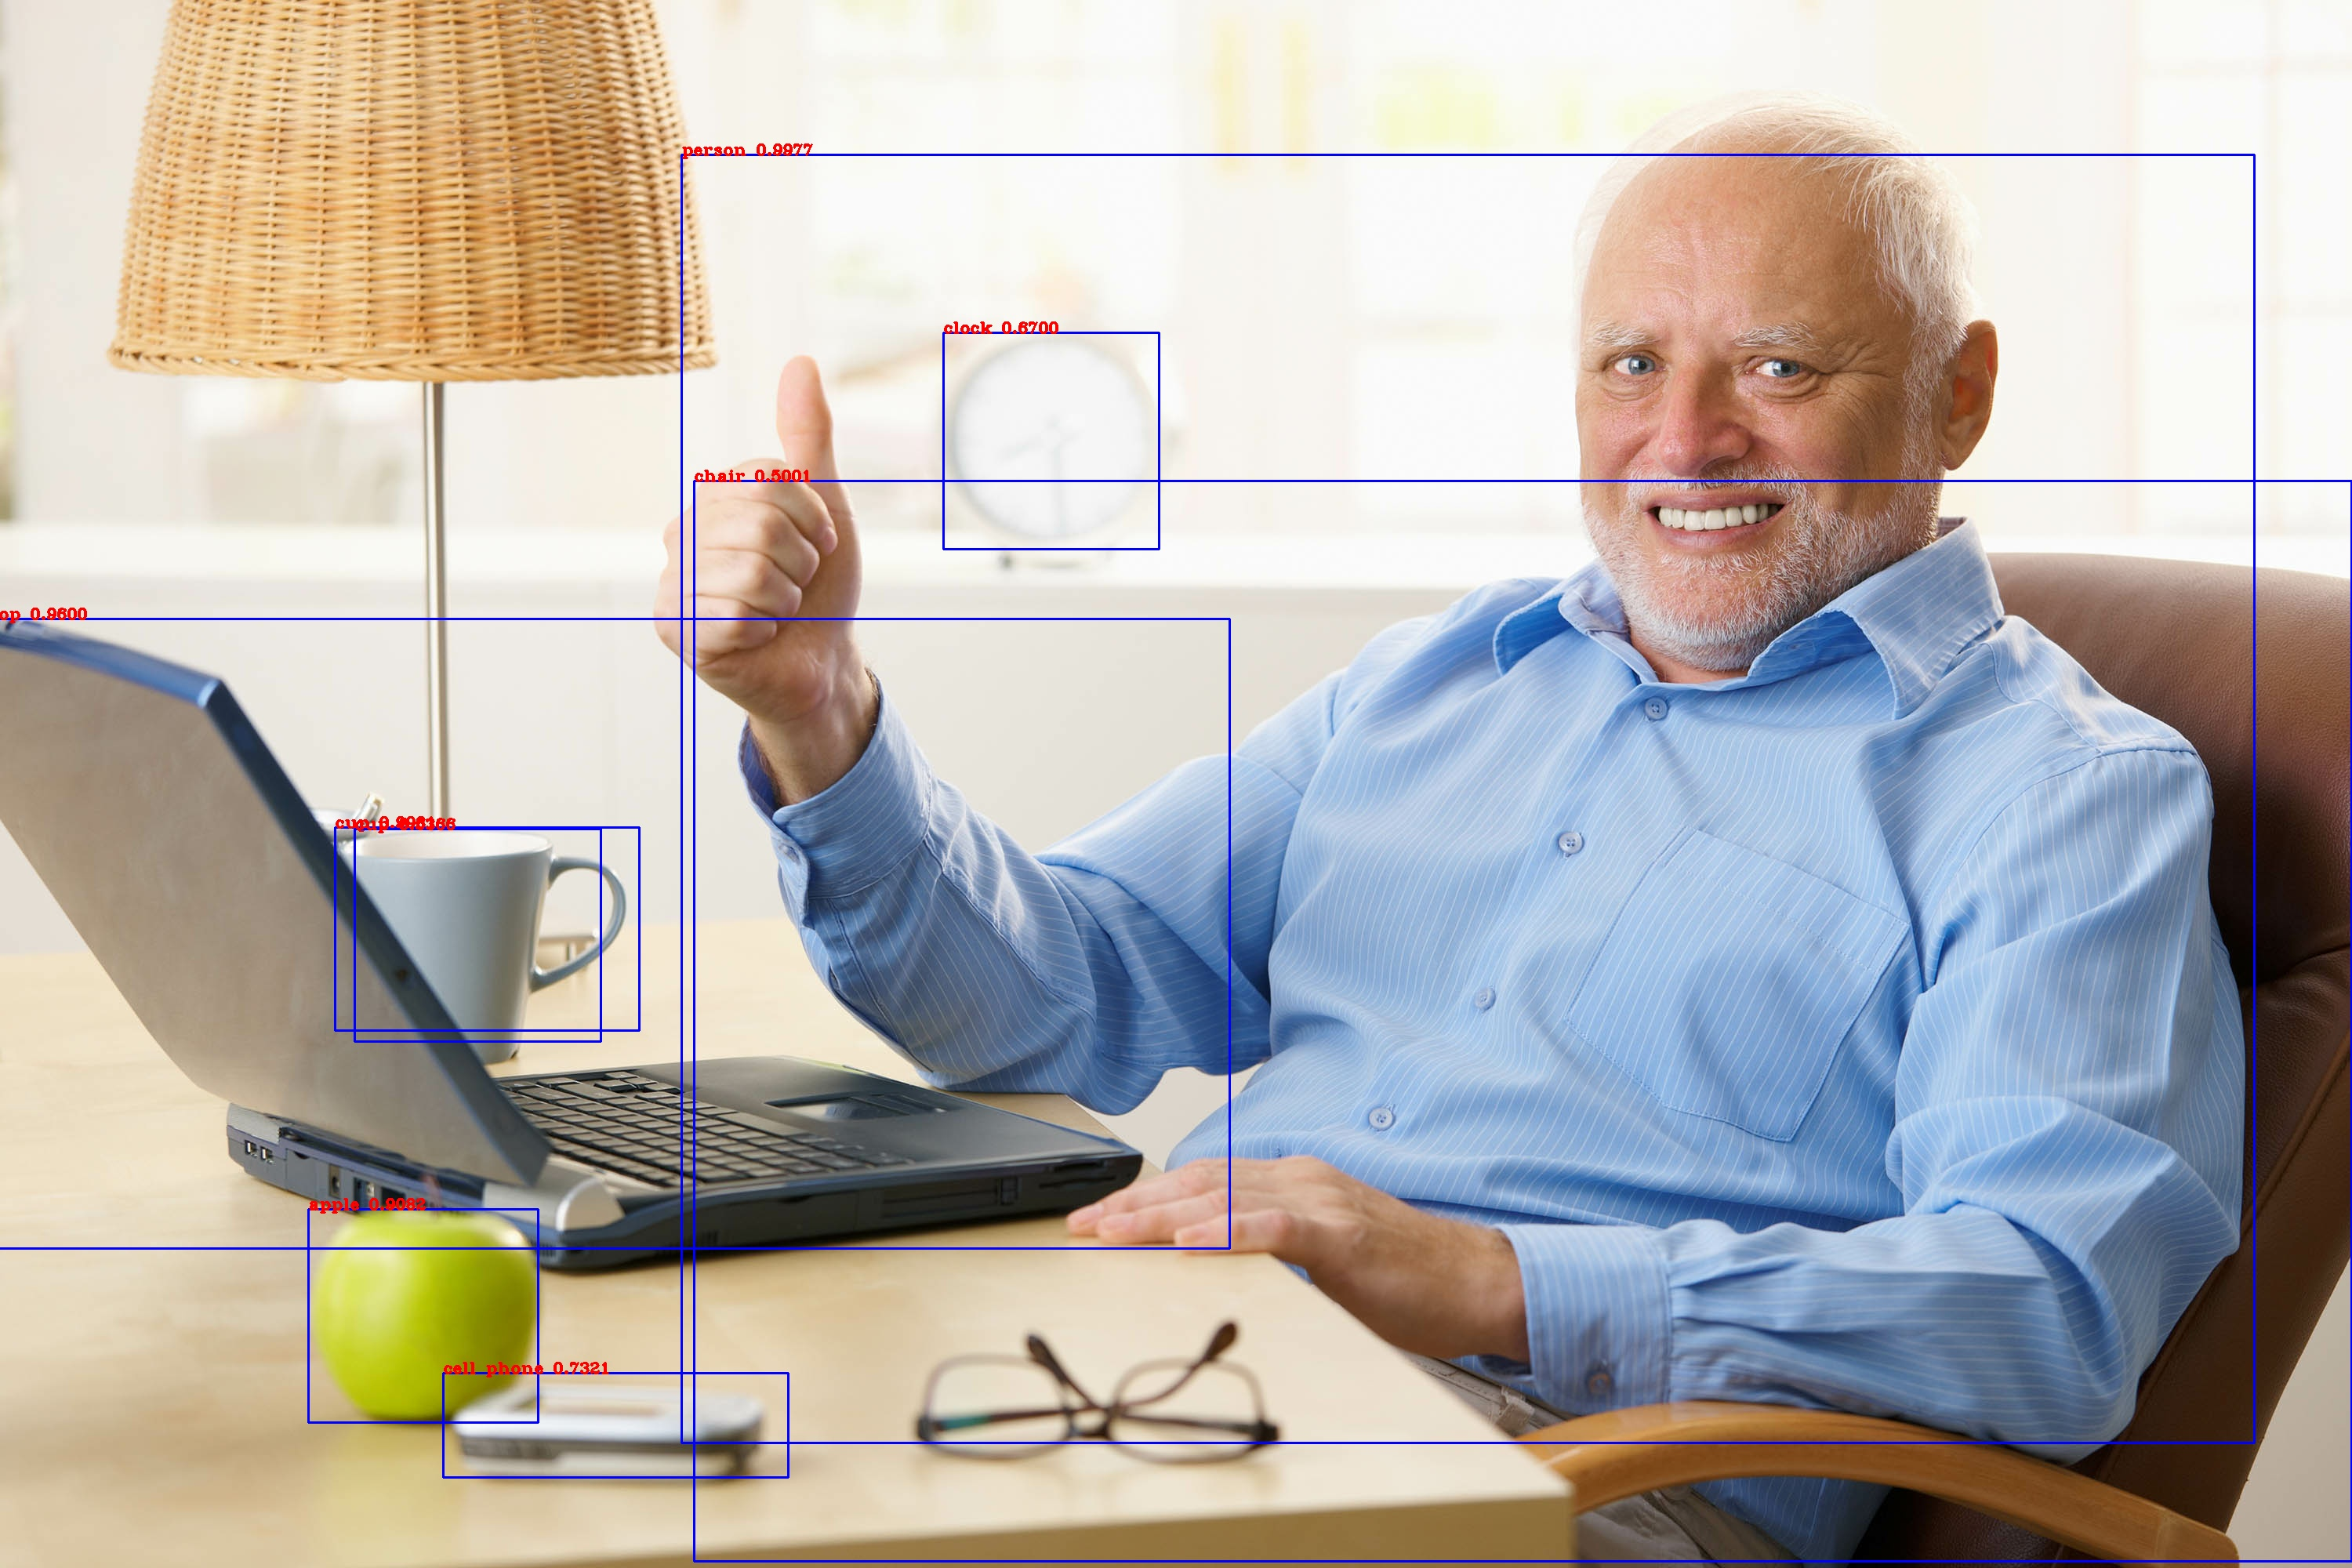

In [60]:
output = detector()
display(Image(data = bytes(cv2.imencode('.jpg', output)[1]), width =1000))